Change "BABA.csv" to any historical data pull from yahoo finance

In [21]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

data = pd.read_csv("BABA.csv")
data.to_numpy()




array([['2014-09-19', 92.699997, 99.699997, ..., 93.889999, 93.889999,
        271879400],
       ['2014-09-22', 92.699997, 92.949997, ..., 89.889999, 89.889999,
        66657800],
       ['2014-09-23', 88.940002, 90.480003, ..., 87.169998, 87.169998,
        39009800],
       ...,
       ['2021-10-20', 180.949997, 182.089996, ..., 177.179993,
        177.179993, 33714400],
       ['2021-10-21', 177.0, 179.779999, ..., 177.419998, 177.419998,
        16444000],
       ['2021-10-22', 179.080002, 182.089996, ..., 177.699997,
        177.699997, 20793200]], dtype=object)

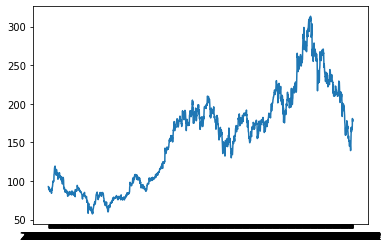

In [22]:

X = data.Date
Y = data.Open
plt.plot(X,Y)

0       9.750000
1       3.449997
2       3.860000
3       3.349999
4       3.000000
          ...   
1782    2.669998
1783    6.990005
1784    5.959991
1785    3.069992
1786    6.279998
Name: Hi-Low, Length: 1787, dtype: float64


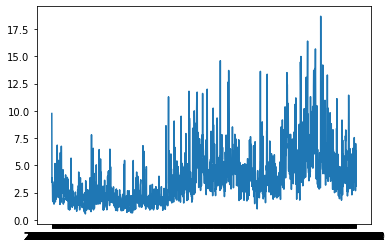

In [23]:
hi_low = []
for i in range(len(data)):
    diff = data.High[i]-data.Low[i]
    hi_low.append(diff)
    

data['Hi-Low'] = hi_low
X = data.Date
Y = data['Hi-Low']
plt.plot(X,Y)
print(data['Hi-Low'])


0      -1.190002
1       2.809998
2       1.770004
3      -2.099999
4       2.169998
          ...   
1782   -0.240005
1783   -6.399994
1784    3.770004
1785   -0.419998
1786    1.380005
Name: Open-Close, Length: 1787, dtype: float64


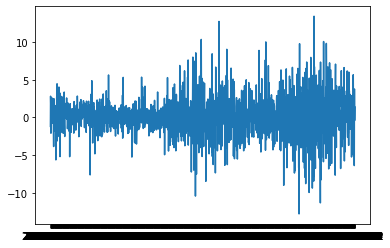

In [24]:
open_close = []
for i in range(len(data)):
    diff = data.Open[i]-data.Close[i]
    open_close.append(diff)
    

data['Open-Close'] = open_close
print(data['Open-Close'])
X = data.Date
Y = data['Open-Close']
plt.plot(X,Y)

In [5]:
labels = []
for i in range(len(data)-1):
    price = data.Open[i]
    stop = price*.95
    take = price*1.10
    a = i + 1
    while stop < data.Close[a] < take and a+1 < len(data):
        a += 1
        
    if stop >= data.Close[a]:
        labels.append(0)
    elif take <= data.Close[a]:
        labels.append(1)
    else:
        labels.append(0)
      

    
labels.append(0)            
print(len(labels))

1787


In [6]:
min_v = min(data['Volume'])
max_v = max(data['Volume'])
norm_volume = []
for volume in data['Volume']:
    norm = (volume-min_v)/(max_v-min_v)
    norm_volume.append(norm)
data['Volume'] = norm_volume

data = data.loc[:,'Open':'Hi-Low']

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.33, random_state=42)


In [14]:
classifier = KNeighborsClassifier(n_neighbors = 100, weights = 'distance')
classifier.fit(data_train.values, labels_train)
labels_validation = classifier.predict(data_test.values)
print("accuracy = " + str(accuracy_score(labels_test, labels_validation)))
print("precision = " + str(precision_score(labels_test, labels_validation)))
print("recall = " + str(recall_score(labels_test, labels_validation)))
print("f1 = " + str(f1_score(labels_test, labels_validation)))

accuracy = 0.7016949152542373
precision = 0.7222222222222222
recall = 0.43333333333333335
f1 = 0.5416666666666666


<function matplotlib.pyplot.show(close=None, block=None)>

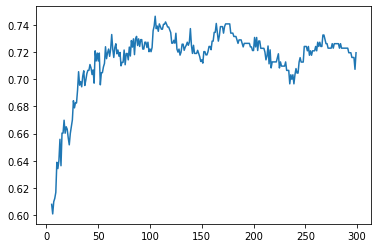

In [17]:
N = []
accuracy = [] 
for n in range(5,300):
    classifier = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
    classifier.fit(data_train.values, labels_train)
    labels_validation = classifier.predict(data_test.values)
    N.append(n)
    accuracy.append(precision_score(labels_test, labels_validation))
    


plt.plot(N,accuracy)  
plt.show
    
    